### Notebook 9 - Importação de Dados Meteorológicos de Satélite e da Estação Solarimétrica

In [6]:
#Importando Bibliotecas
import pvlib
import pandas as pd 
from pvlib import location
import matplotlib.pyplot as plt

### Dados da Estação Solarimétrica

In [7]:
#Importando dados de Estação Meteorológica 
#Localização da Universidade de Oregon
latitude = 44.0446
longitude = -123.0726
altitude = 123.0
site = pvlib.location.Location(latitude, longitude)


df_weather = pvlib.iotools.read_midc_raw_data_from_nrel('UOSMRL',               # Station id
                                                    pd.Timestamp('20210101'),   # Start date YYYYMMDD
                                                    pd.Timestamp('20211231'))   # End date  YYYYMMDD

df_weather.head(3)

,Unnamed: 0,Year,DOY,PST,SR20 Temp [deg C],Direct NIP [W/m^2],Diffuse [W/m^2],Global LI-200 [W/m^2],Relative Humidity [%],Air Temperature [deg C],...,CHP1 Temp [deg K],CMP22 Temp [deg K],Avg Wind Direction @ 10m [deg from N],Zenith Angle [degrees],Azimuth Angle [degrees],Airmass,Solar Eclipse Shading,Direct SAMPA/Bird (calc) [W/m^2],Global SAMPA/Bird (calc) [W/m^2],Diffuse SAMPA/Bird (calc) [W/m^2]
2021-01-01 00:00:00-08:00,0,2021,1,0,-0.002,0.000,-1.057,0.017,80.8,9.05,...,282.0,283.2,131.4,158.67385,349.90342,-1.0,0.0,0.0,0.0,0.0
2021-01-01 00:01:00-08:00,0,2021,1,1,0.002,0.123,-1.039,0.030,80.6,9.09,...,281.9,283.2,149.0,158.70431,350.53096,-1.0,0.0,0.0,0.0,0.0
2021-01-01 00:02:00-08:00,0,2021,1,2,0.005,0.181,-1.041,0.028,80.3,9.10,...,281.9,283.2,150.8,158.73283,351.16003,-1.0,0.0,0.0,0.0,0.0


In [8]:
df_weather.keys()

Index(['Unnamed: 0', 'Year', 'DOY', 'PST', 'SR20 Temp [deg C]',
       'Direct NIP [W/m^2]', 'Diffuse [W/m^2]', 'Global LI-200 [W/m^2]',
       'Relative Humidity [%]', 'Air Temperature [deg C]',
       'Avg Wind Speed @ 10m [m/s]', 'Station Pressure [mBar]',
       'Downwelling IR PIR [W/m^2]', 'Instrument Net PIR [W/m^2]',
       'PIR Case Temp [deg K]', 'PIR Dome Temp [deg K]',
       'Logger Battery [VDC]', 'Direct CHP1 [W/m^2]', 'Global CMP22 [W/m^2]',
       'CHP1 Temp [deg K]', 'CMP22 Temp [deg K]',
       'Avg Wind Direction @ 10m [deg from N]', 'Zenith Angle [degrees]',
       'Azimuth Angle [degrees]', 'Airmass', 'Solar Eclipse Shading',
       'Direct SAMPA/Bird (calc) [W/m^2]', 'Global SAMPA/Bird (calc) [W/m^2]',
       'Diffuse SAMPA/Bird (calc) [W/m^2]'],
      dtype='object')

In [9]:
df_weather = df_weather[['Global CMP22 [W/m^2]', 'Diffuse [W/m^2]', 'Direct CHP1 [W/m^2]']]
# Rename the columns
df_weather.columns = ['ghi', 'dhi', 'dni']

In [10]:
# Aplicando a função resample para converter os dados de 1 em 1 minuto para dados horários e atribuindo à uma nova variável
df_weather_horário = df_weather.resample('H').mean()

C:\Users\joaof\AppData\Local\Temp\ipykernel_13888\475243824.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather_horário = df_weather.resample('H').mean()


<Axes: >

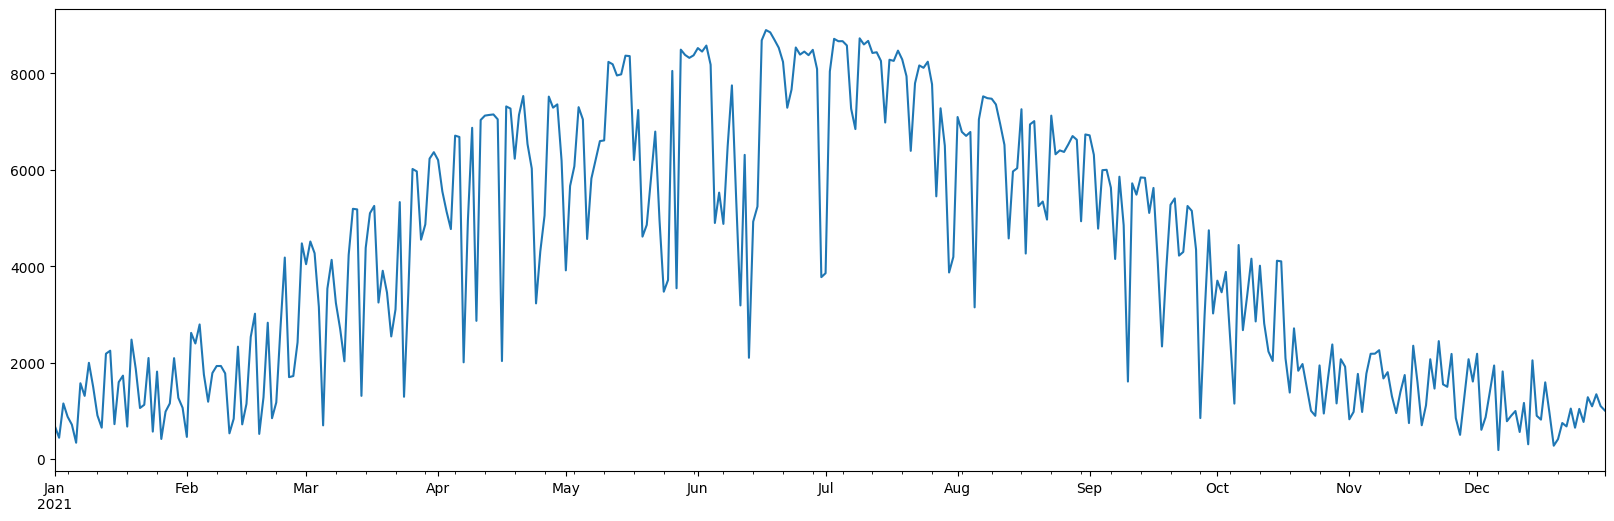

In [11]:
# Convertendo de dados horários para diários
df_weather_horário['ghi'].resample('D').sum().plot(figsize=(20,6))

### Dados de Satélite: NSRDB e PVGIS
1) NSRDB
2) PVGIS

In [ ]:
# Importando Dados de Satélite da NSRDB - É preciso solicitar a chave de API no site https://developer.nrel.gov/signup/
# Os dados de satélite já vem em resolução horária. Portando, para a conversão de dados horários para diários, basta aplicar a função resample('D').sum() como feito acima.
email = 'your@email.com'
api_key = 'API_KEY'  # substitua pela sua chave de API
year = 2021

nsrdb_data_2021, metadata4 = pvlib.iotools.get_nsrdb_psm4_full_disc(latitude, longitude, api_key, email, year, time_step=60, 
                                                              parameters=('air_temperature', 'dew_point', 'dhi', 'dni', 'ghi', 'surface_albedo', 'surface_pressure', 'wind_direction', 'wind_speed'), 
                                                              leap_day=True, full_name='pvlib python', affiliation='pvlib python', utc=True, map_variables=True, url=None, timeout=30)

In [13]:
nsrdb_data_2021

,Year,Month,Day,Hour,Minute,temp_air,temp_dew,dhi,dni,ghi,albedo,pressure,wind_direction,wind_speed
2021-01-01 00:00:00+00:00,2021,1,1,0,0,7.1,6.7,15.0,0.0,15.0,0.09,995.0,169.0,0.0
2021-01-01 01:00:00+00:00,2021,1,1,1,0,6.6,6.2,0.0,0.0,0.0,0.09,995.0,164.0,0.0
2021-01-01 02:00:00+00:00,2021,1,1,2,0,6.1,5.7,0.0,0.0,0.0,0.09,995.0,156.0,0.0
2021-01-01 03:00:00+00:00,2021,1,1,3,0,5.7,5.3,0.0,0.0,0.0,0.09,995.0,155.0,0.0
2021-01-01 04:00:00+00:00,2021,1,1,4,0,5.5,5.1,0.0,0.0,0.0,0.09,995.0,151.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00+00:00,2021,12,31,19,0,2.2,1.6,192.0,6.0,194.0,0.65,987.0,255.0,0.0
2021-12-31 20:00:00+00:00,2021,12,31,20,0,2.5,1.8,233.0,15.0,239.0,0.65,987.0,302.0,0.0
2021-12-31 21:00:00+00:00,2021,12,31,21,0,2.8,1.9,72.0,853.0,394.0,0.65,987.0,311.0,0.0
2021-12-31 22:00:00+00:00,2021,12,31,22,0,3.0,2.0,64.0,817.0,327.0,0.65,988.0,314.0,0.1


In [14]:
# Importando Dados de Satélite do PVGIS-ERA5
start = 2021
end = 2021

pvgis_dataset_ghi_2021, metadata2021 = pvlib.iotools.get_pvgis_hourly(latitude, longitude, start, end, 
                               raddatabase='PVGIS-ERA5', components=False, surface_tilt=0, 
                               surface_azimuth=0, outputformat='json', usehorizon=True, 
                               userhorizon=None, pvcalculation=False, peakpower=None, 
                               pvtechchoice='crystSi', mountingplace='free', loss=0, 
                               trackingtype=0, optimal_surface_tilt=False, optimalangles=False, 
                               url='https://re.jrc.ec.europa.eu/api/', map_variables=True, timeout=30)


In [15]:
pvgis_dataset_ghi_2021

,poa_global,solar_elevation,temp_air,wind_speed,Int
time,,,,,
2021-01-01 00:30:00+00:00,5.55,1.30,8.44,1.38,0
2021-01-01 01:30:00+00:00,0.00,0.00,7.83,1.45,0
2021-01-01 02:30:00+00:00,0.00,0.00,7.62,1.45,0
2021-01-01 03:30:00+00:00,0.00,0.00,7.42,1.45,0
2021-01-01 04:30:00+00:00,0.00,0.00,7.17,1.45,0
...,...,...,...,...,...
2021-12-31 19:30:00+00:00,267.39,22.06,0.84,1.10,0
2021-12-31 20:30:00+00:00,289.29,22.76,2.79,1.24,0
2021-12-31 21:30:00+00:00,259.04,20.69,2.86,1.31,0


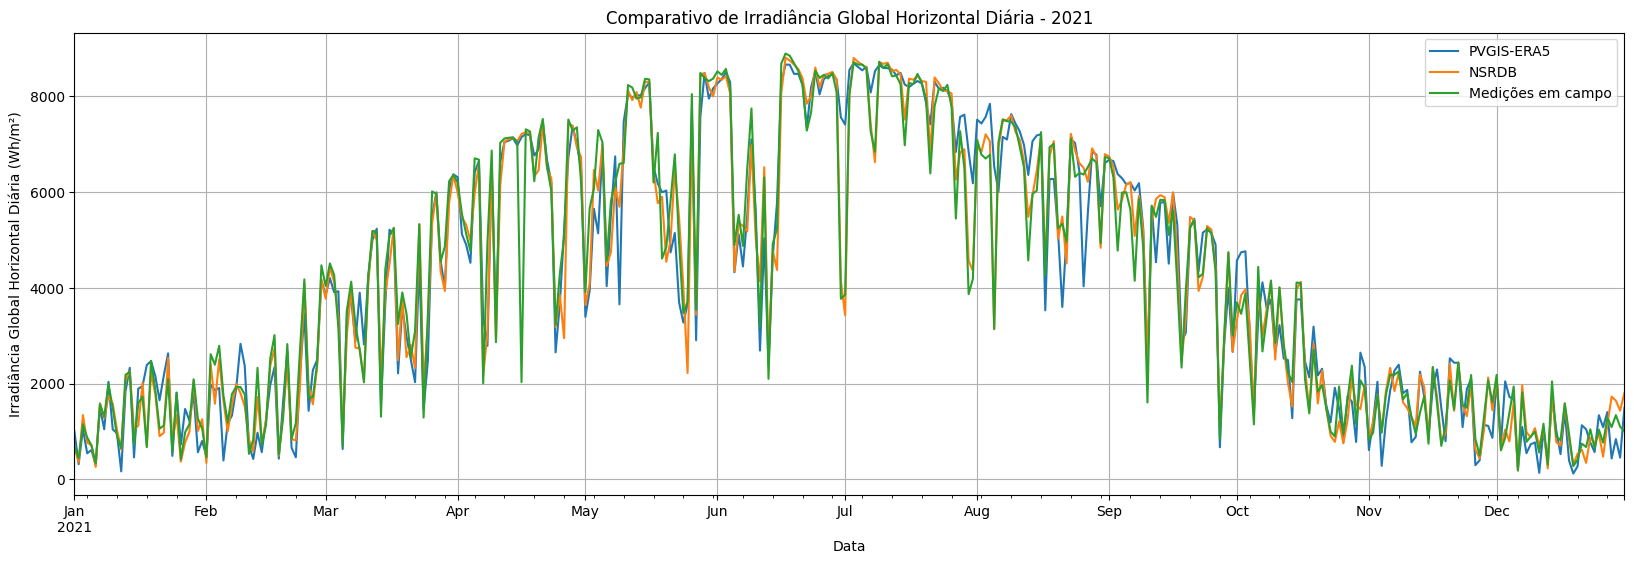

In [21]:
pvgis_dataset_ghi_2021['poa_global'].resample('D').sum().plot(figsize=(20,6))
nsrdb_data_2021['ghi'].resample('D').sum().plot(figsize=(20,6))
df_weather_horário['ghi'].resample('D').sum().plot(figsize=(20,6))
plt.legend(['PVGIS-ERA5', 'NSRDB', 'Medições em campo'])
plt.title('Comparativo de Irradiância Global Horizontal Diária - 2021')
plt.ylabel('Irradiância Global Horizontal Diária (Wh/m²)')
plt.xlabel('Data')
plt.grid()
plt.show()

### Comparativo de Dados de Satélite com Dados Medidos em Campo

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dados dos modelos
models = {
    'PVGIS': pvgis_dataset_ghi_2021['poa_global'].resample('D').sum(),
    'NSRDB': nsrdb_data_2021['ghi'].resample('D').sum()
}

# Dados medidos
measured = df_weather_horário['ghi'].resample('D').sum()

# 2. Cálculo das métricas
metrics = pd.DataFrame(columns=['RMSE (W/m²)', 'MAE (W/m²)', 'R²', 'Bias (W/m²)', 'Energia Total (Wh/m²)'])

for name, model in models.items():
    y_true = measured
    y_pred = model
    
    metrics.loc[name] = {
        'RMSE (W/m²)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE (W/m²)': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred),
        'Bias (W/m²)': np.mean(y_pred - y_true),
        'Energia Total (Wh/m²)': model.sum()
    }

# Adicionando dados medidos
metrics.loc['Dados Medidos'] = {
    'RMSE (W/m²)': np.nan,
    'MAE (W/m²)': np.nan,
    'R²': np.nan,
    'Bias (W/m²)': np.nan,
    'Energia Total (Wh/m²)': measured.sum()
}

# 3. Exibição das métricas com formatação
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Métricas de Desempenho para 2021 ===")
print(metrics)


=== Métricas de Desempenho para 2021 ===
               RMSE (W/m²)  MAE (W/m²)   R²  Bias (W/m²)  \
PVGIS               770.67      488.20 0.92          NaN   
NSRDB               482.99      278.42 0.97          NaN   
Dados Medidos          NaN         NaN  NaN          NaN   

               Energia Total (Wh/m²)  
PVGIS                     1537537.77  
NSRDB                     1519226.00  
Dados Medidos             1532194.47  
